# 作業目標:
1. 藉由固定的 dataset, 來驗證不同loss function
2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響

# 作業重點:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate

# 導入必要的函數


In [0]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [20]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [21]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [0]:
model = Sequential()

In [0]:
#卷積層1
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))


#卷積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))

In [29]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [0]:
#try:
#    model.load_weights("SaveModel/cifarCnnModel.h5")
#    print("載入模型成功!繼續訓練模型")
#except :    
#    print("載入模型失敗!開始訓練一個新模型")

# 訓練模型

**MSE的部分**

In [31]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                          validation_split=0.2,
                          epochs=10, batch_size=16, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 13s 334us/step - loss: 0.0898 - acc: 0.1284 - val_loss: 0.0890 - val_acc: 0.2007
Epoch 2/10
40000/40000 [==============================] - 13s 313us/step - loss: 0.0883 - acc: 0.1770 - val_loss: 0.0879 - val_acc: 0.2379
Epoch 3/10
40000/40000 [==============================] - 13s 313us/step - loss: 0.0866 - acc: 0.2164 - val_loss: 0.0864 - val_acc: 0.2682
Epoch 4/10
40000/40000 [==============================] - 13s 315us/step - loss: 0.0846 - acc: 0.2519 - val_loss: 0.0847 - val_acc: 0.2943
Epoch 5/10
40000/40000 [==============================] - 13s 315us/step - loss: 0.0831 - acc: 0.2784 - val_loss: 0.0834 - val_acc: 0.3161
Epoch 6/10
40000/40000 [==============================] - 13s 314us/step - loss: 0.0817 - acc: 0.3007 - val_loss: 0.0823 - val_acc: 0.3338
Epoch 7/10
40000/40000 [==============================] - 13s 313us/step - loss: 0.0807 - acc: 0.3178 - val_loss: 0.

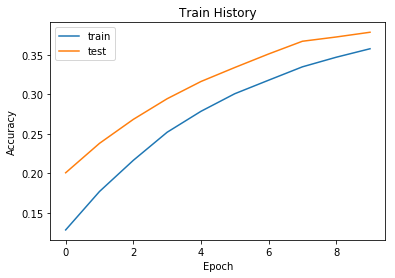

In [32]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'])
    plt.show()
show_train_history('acc','val_acc')

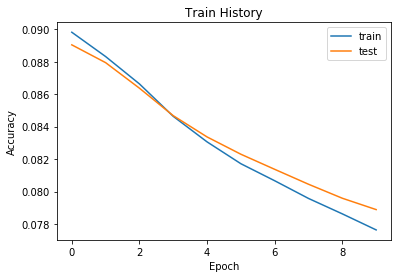

In [33]:
show_train_history('loss','val_loss')

**binary_crossentropy的部分**

In [34]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                          validation_split=0.2,
                          epochs=10, batch_size=16, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 14s 352us/step - loss: 0.2634 - acc: 0.9043 - val_loss: 0.2636 - val_acc: 0.9012
Epoch 2/10
40000/40000 [==============================] - 14s 339us/step - loss: 0.2513 - acc: 0.9063 - val_loss: 0.2536 - val_acc: 0.9028
Epoch 3/10
40000/40000 [==============================] - 14s 350us/step - loss: 0.2424 - acc: 0.9083 - val_loss: 0.2480 - val_acc: 0.9036
Epoch 4/10
40000/40000 [==============================] - 14s 338us/step - loss: 0.2361 - acc: 0.9096 - val_loss: 0.2415 - val_acc: 0.9049
Epoch 5/10
40000/40000 [==============================] - 13s 337us/step - loss: 0.2301 - acc: 0.9115 - val_loss: 0.2354 - val_acc: 0.9066
Epoch 6/10
40000/40000 [==============================] - 13s 337us/step - loss: 0.2243 - acc: 0.9131 - val_loss: 0.2310 - val_acc: 0.9085
Epoch 7/10
40000/40000 [==============================] - 14s 338us/step - loss: 0.2195 - acc: 0.9146 - val_loss: 0.

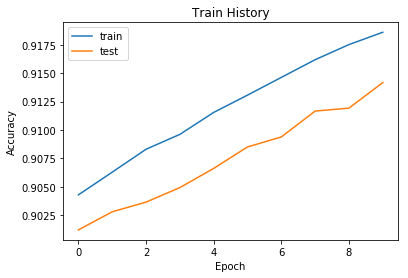

In [35]:
show_train_history('acc','val_acc')

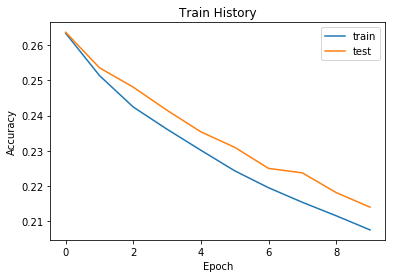

In [36]:
show_train_history('loss','val_loss')

# 課程目標
利用Keras 的 CIFAR10 dataset 來驗證損失函數對於模型精確度的影響

# 範例重點:
模型架構的層數

使用何種LOSS function
# 導入必要的libray

In [3]:
import keras
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)
#np.random.seed(10)的作用：使得隨機數據可預測

Using TensorFlow backend.


# 資料準備

In [4]:
#取得Keras CIFAR10 Dataset, 並分成Training 與 Test set
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [5]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [6]:
#資料正規化, 並設定 data array 為浮點數
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

#針對Label 做 ONE HOT ENCODE, 並查看維度資訊
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [0]:
# 宣告採用序列模型
model = Sequential()

In [0]:
#卷積層1與池化層1
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#卷積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#卷積層3與池化層3
model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#卷積層4與池化層4
model.add(Conv2D(filters=256, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())

#建立全網路連接層
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))

#建立輸出層
model.add(Dense(10, activation='softmax'))

#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 256)         295168    
__________

In [0]:
# 載入之前訓練的模型
#try:
#    model.load_weights("SaveModel/cifarCnnModel.h5")
#    print("載入模型成功!繼續訓練模型")
#except :    
#    print("載入模型失敗!開始訓練一個新模型")

# 訓練模型


In [0]:
#模型編譯
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [17]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 4s 97us/step - loss: 0.1291 - acc: 0.9546 - val_loss: 1.4387 - val_acc: 0.7050
Epoch 2/12
37500/37500 [==============================] - 4s 94us/step - loss: 0.1265 - acc: 0.9555 - val_loss: 1.3506 - val_acc: 0.7245
Epoch 3/12
37500/37500 [==============================] - 4s 95us/step - loss: 0.1127 - acc: 0.9602 - val_loss: 1.4176 - val_acc: 0.7266
Epoch 4/12
37500/37500 [==============================] - 4s 94us/step - loss: 0.0966 - acc: 0.9660 - val_loss: 1.4943 - val_acc: 0.7068
Epoch 5/12
37500/37500 [==============================] - 4s 94us/step - loss: 0.0987 - acc: 0.9649 - val_loss: 1.3851 - val_acc: 0.7255
Epoch 6/12
37500/37500 [==============================] - 4s 94us/step - loss: 0.0746 - acc: 0.9742 - val_loss: 1.5397 - val_acc: 0.7236
Epoch 7/12
37500/37500 [==============================] - 4s 94us/step - loss: 0.0863 - acc: 0.9702 - val_loss: 1.6406 - val_acc

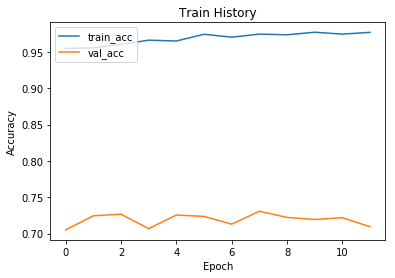

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()
show_train_history('acc','val_acc')

參考資料

[TensorFlow筆記-06-神經網絡優化-損失函數，自定義損失函數，交叉熵](https://blog.csdn.net/qq_40147863/article/details/82015360)  
[Hinge_loss](https://en.wikipedia.org/wiki/Hinge_loss)  
[使用損失函數](https://keras.io/losses/)